In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.core.display import HTML

%matplotlib inline

In [2]:
# import data
train = pd.read_csv('data/train_merged.csv')
train.head()

,game_date,home_team,away_team,country,neutral,home_win,attack_diff,bup_dribbling_diff,bup_passing_diff,bup_speed_diff,...,last_year_avg_diff,previous_points_diff,rank_change_diff,rank_diff,three_year_ago_avg_diff,three_year_ago_weighted_diff,total_points_diff,two_year_ago_avg_diff,two_year_ago_weighted_diff,gdp_diff
0,2010-03-03 00:00:00+00:00,Mexico,New Zealand,USA,True,1,13.0,-0.0,-25.0,-5.0,...,-0.0,531.0,-3.0,-62.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000
1,2010-05-24 00:00:00+00:00,Australia,New Zealand,Australia,False,1,11.0,-0.0,-0.0,-0.0,...,-0.0,489.0,-2.0,-58.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.295569
2,2010-06-20 00:00:00+00:00,Italy,New Zealand,South Africa,True,2,23.0,-0.0,-40.0,-3.0,...,-0.0,771.0,-0.0,-73.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000
3,2010-06-04 00:00:00+00:00,Slovenia,New Zealand,Slovenia,False,1,10.0,-0.0,-0.0,-0.0,...,-0.0,447.0,-2.0,-53.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000
4,2010-06-24 00:00:00+00:00,Paraguay,New Zealand,South Africa,True,2,15.0,-0.0,-30.0,-5.0,...,-0.0,409.0,-1.0,-47.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000


In [3]:
X = train.iloc[:,6:]

# scale data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [4]:
# pca decomposition
dim = X.shape[1]
pca = PCA().fit(X_scaled)
scores = pca.transform(X_scaled)

# correlation between PCs and data
pc_cors = np.corrcoef(X_scaled, scores, rowvar=False)[:dim, dim:] # only want cor(x, y)

In [5]:
# https://stackoverflow.com/questions/22348229/matplotlib-legend-for-an-arrow
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

def make_legend_arrow(legend, orig_handle,
                      xdescent, ydescent,
                      width, height, fontsize):
    p = mpatches.FancyArrow(0, 0.5*height, width, 0, length_includes_head=True, head_width=0.75*height )
    return p

In [121]:
import plotly
plotly.tools.set_credentials_file(username='ongshengsiong', api_key='fC66C9lv4st6AKGfBWYV')

In [188]:
X.columns.values[13]

'growth_diff'

In [187]:
pc_cors[:,1]

array([-0.12743375, -0.35232221,  0.24534996,  0.30661297,  0.2419436 ,
        0.23818307,  0.11533429,  0.29154681,  0.37071885,  0.12966129,
       -0.05617904, -0.78484336,  0.06816692,  0.74895819, -0.05261285,
       -0.00468216,  0.11904756, -0.73286876,  0.06737507,  0.01127724,
       -0.08727227,  0.09708455, -0.00326455, -0.00326455,  0.00796387,
        0.00796374, -0.00875358,  0.02067707,  0.03035724,  0.15366251,
        0.15366526,  0.04320467,  0.10687435,  0.10687552, -0.15609754])

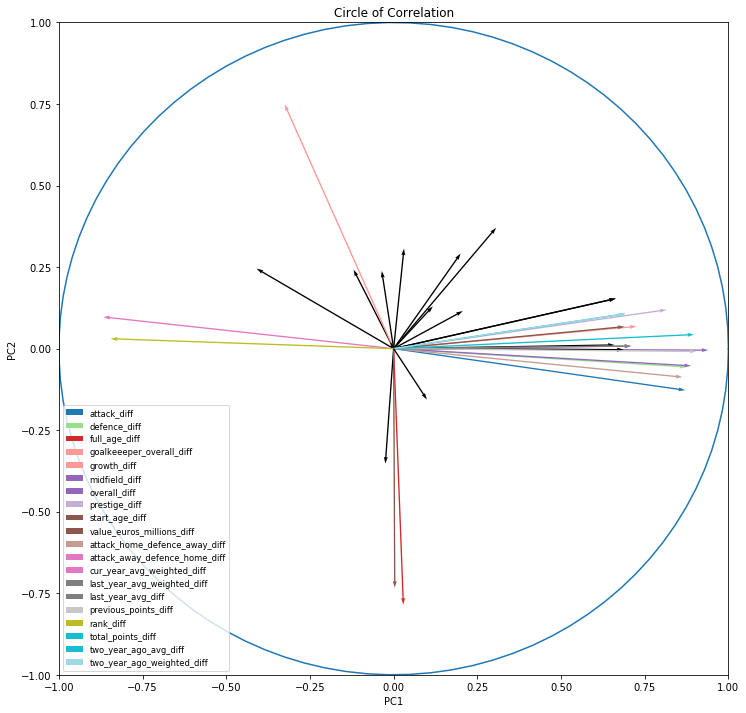

In [186]:
# # https://stackoverflow.com/questions/37815987/plot-a-correlation-circle-in-python
# https://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib
from matplotlib.pyplot import cm


# get top 20 
vec_len = [np.sqrt(pc_cors[i,0]**2 + pc_cors[i,1]**2) for i in np.arange(dim)]
top20_vec = sorted(range(len(vec_len)), key=lambda i: vec_len[i], reverse=True)[:20]

x = np.zeros((35,1))
y = np.zeros((35,1))
u = pc_cors[:,0]
v = pc_cors[:,1]

fig, ax = plt.subplots(figsize=(12, 12))

color = iter(cm.tab20(np.linspace(0,1,dim)))

for i in np.arange(dim):
    c = next(color)
    if i in top20_vec:
        ax.quiver(0, 0, pc_cors[i,0], pc_cors[i,1], 
                  scale=1, 
                  angles='xy', 
                  scale_units='xy',
                  width=0.002,
                  label=X.columns.values[i],
                  color=c)
    else:
        ax.quiver(0, 0, pc_cors[i,0], pc_cors[i,1], 
                  scale=1, 
                  angles='xy', 
                  scale_units='xy',
                  width=0.002)        


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale        

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_title('Circle of Correlation')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.legend(loc=3, fontsize='small');

We only highlighted the top 20 predictors with largest correlation magnitude as these are likely to be the more important predictors. 

`start_age_diff` and `full_age_diff` are naturally correlated, and seem to explain a substantial amount of variation in the data. `growth_diff`, which is on the other side of the correlation circle, seems to explain variation that is almost the opposite of `start_age_diff` and `full_age_diff`. This makes intuitive sense as we would expect younger players to have more room for growth.

`attack_away_defence_home_diff` and `rank_diff` also seem to be explain similar variation in the data. The rest of the predictors are all clustered at the 3 o'clock region of the circle, right across the predictors `attack_away_defence_home_diff` and `rank_diff`. This suggests that these predictors explain similar variation in the data and might be correlated.



In [71]:
# import data
sofifa = pd.read_csv('data/sofifa_final.csv')
sofifa['date'] = pd.to_datetime(sofifa['date'], utc=True)

sofifa.head()

,team,date,overall,attack,midfield,defence,prestige,start_age,full_age,bup_speed,...,cc_passing,cc_crossing,cc_shooting,d_pressure,d_aggresion,d_width,wage_euros_thousands,value_euros_millions,growth,goalkeeeper_overall
0,Brazil,2018-11-15 00:00:00+00:00,81.0,84.0,80.0,80.0,10.0,29.64,29.48,52.0,...,61.0,44.0,68.0,75.0,54.0,64.0,43.869565,15.795652,0.043478,82.0
1,Brazil,2018-11-13 00:00:00+00:00,81.0,84.0,80.0,80.0,10.0,29.64,29.48,52.0,...,61.0,44.0,68.0,75.0,54.0,64.0,43.869565,15.795652,0.043478,82.0
2,Brazil,2018-11-05 00:00:00+00:00,81.0,84.0,80.0,80.0,10.0,29.64,29.48,52.0,...,61.0,44.0,68.0,75.0,54.0,64.0,43.869565,15.795652,0.043478,82.0
3,Brazil,2018-11-01 00:00:00+00:00,81.0,84.0,80.0,80.0,10.0,29.64,29.48,52.0,...,61.0,44.0,68.0,75.0,54.0,64.0,43.869565,15.795652,0.043478,82.0
4,Brazil,2018-10-29 00:00:00+00:00,81.0,84.0,80.0,80.0,10.0,29.64,29.48,52.0,...,61.0,44.0,68.0,75.0,54.0,64.0,43.869565,15.795652,0.043478,82.0


In [72]:
teams = ['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay', 'Morocco', 'Iran',
       'Portugal', 'Spain', 'France', 'Australia', 'Argentina', 'Iceland',
       'Peru', 'Denmark', 'Croatia', 'Nigeria', 'Costa Rica', 'Serbia',
       'Germany', 'Mexico', 'Brazil', 'Switzerland', 'Sweden',
       'Korea Republic', 'Belgium', 'Panama', 'Tunisia', 'England',
       'Colombia', 'Japan', 'Poland', 'Senegal']

pre_wc_rating = sofifa[(sofifa.team.isin(teams)) & (sofifa.date == '2018-06-16')]
teams_wc = pre_wc_rating.team.values
pre_wc_rating = pre_wc_rating.iloc[:,2:]

In [73]:
# check that we have 32 teams
assert pre_wc_rating.shape[0] == 32

In [97]:
# scale data
scaler_wc = StandardScaler()
scaler.fit(pre_wc_rating)
pre_wc_rating_scaled = scaler.transform(pre_wc_rating)


pca_wc_mod = PCA().fit(pre_wc_rating_scaled)
pca_wc = pca_wc_mod.transform(pre_wc_rating_scaled)
n = pca_wc.shape[0]
d = pca_wc.shape[1]

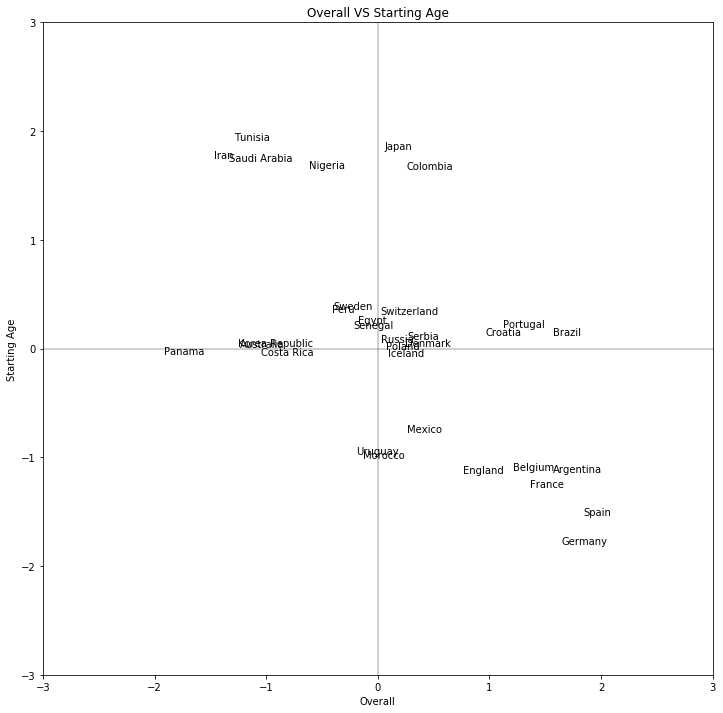

In [110]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

for i in np.arange(n):
    ax.text(pre_wc_rating_scaled[i,2]+np.random.uniform(0,0.1), 
            pre_wc_rating_scaled[i,7]+np.random.uniform(0,0.1), teams_wc[i])

    
ax.axhline(0, color='gray', alpha=0.5)
ax.axvline(0, color='gray', alpha=0.5)
ax.set_title('Overall VS Starting Age')
ax.set_xlabel('Overall')
ax.set_ylabel('Starting Age');

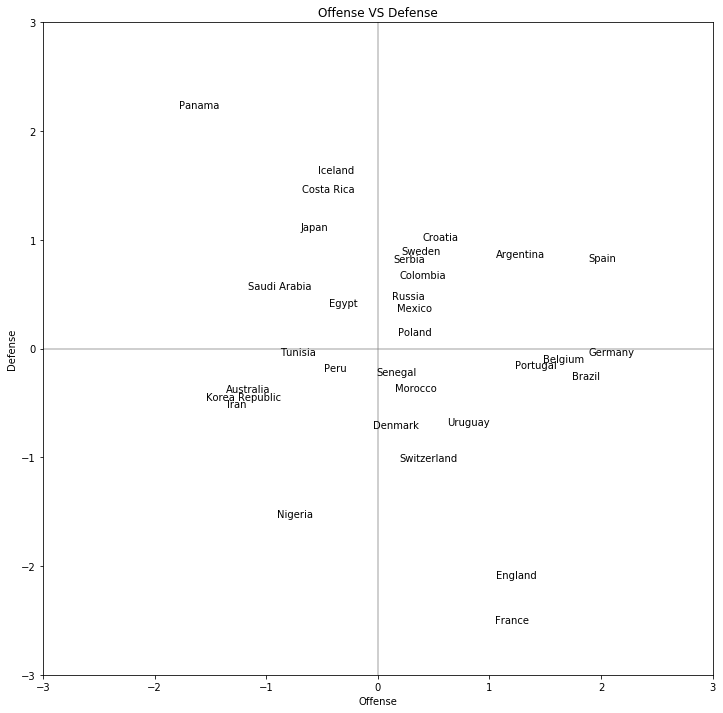

In [108]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

for i in np.arange(n):
    ax.text(pre_wc_rating_scaled[i,3]+np.random.uniform(0,0.1), 
            pre_wc_rating_scaled[i,5]+np.random.uniform(0,0.1), teams_wc[i])

    
ax.axhline(0, color='gray', alpha=0.5)
ax.axvline(0, color='gray', alpha=0.5)
ax.set_title('Offense VS Defense')
ax.set_xlabel('Offense')
ax.set_ylabel('Defense');

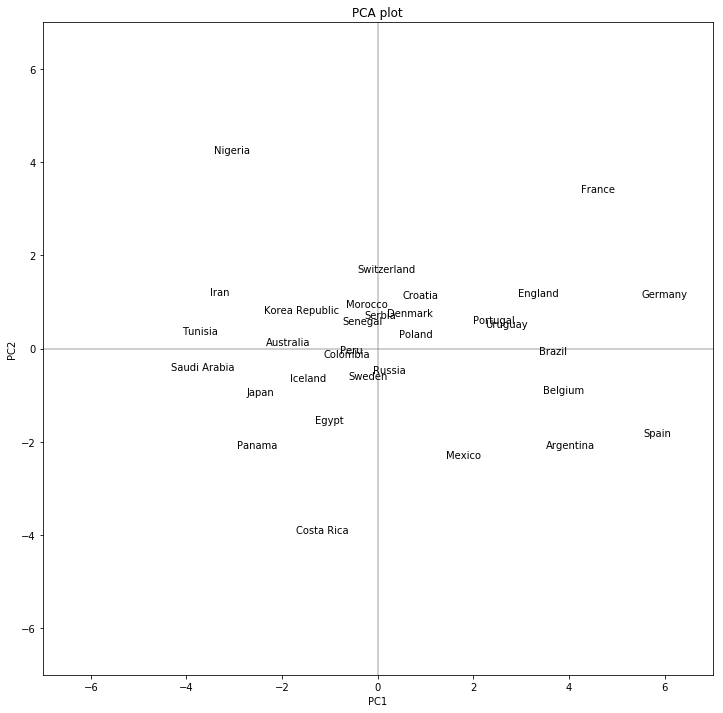

In [98]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)

for i in np.arange(n):
    ax.text(pca_wc[i,0], pca_wc[i,1], teams_wc[i])

    
ax.axhline(0, color='gray', alpha=0.5)
ax.axvline(0, color='gray', alpha=0.5)
ax.set_title('PCA plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2');

In [101]:
loadings = pd.DataFrame(pca_wc_mod.components_, columns=pre_wc_rating.columns.values)
loadings.iloc[:2,:]

,overall,attack,midfield,defence,prestige,start_age,full_age,bup_speed,bup_dribbling,bup_passing,cc_passing,cc_crossing,cc_shooting,d_pressure,d_aggresion,d_width,wage_euros_thousands,value_euros_millions,growth,goalkeeeper_overall
0,0.344615,0.297234,0.330777,0.346562,0.314398,-0.088694,-0.033031,-0.305547,-0.102811,-0.305913,-0.273772,-0.076316,-0.230965,0.175877,0.072288,0.004841,-0.0,-0.0,-0.042762,0.293134
1,0.092605,0.132644,0.047415,0.032724,0.074232,-0.482917,-0.555090,0.080062,0.240904,0.081064,0.062521,-0.048824,0.139404,-0.193788,-0.068769,0.264955,0.0,0.0,0.462669,-0.019433


We can see that PC1 is greatly influenced by `overall`, `defence`, and `midfield`, while PC2 is greatly influenced by `full_age` (negative), `start_age` (negative), and `growth`. This gives us a good way to think about the 2D representation of our dataset summarized by the first two PCs. Teams with higher PC2s generally have lower ages and thus more potential for growth. They are likely to have lots of young, promising players. Teams with higher PC1s are statistically better all-round teams. 

While this PCA plot is not a measure of how likely a team will win the World Cup (since PCAs only involve the predictors), it can still give us an intuition into the various World Cup teams. 

We immediately see that France is probably a strong all-round team that also has young, promising players. Nigeria is probably a below-average team but with young, promising players. Costa Rica is probably a below-average team with older players near their peak. Spain is probably a strong all-round team but with older players near their peak. These largely corroborates what we know about those teams.